<a href="https://colab.research.google.com/github/Areefahnk/WebApp-Open-Weather-API-MalariaOutbreakWarning-/blob/main/Outbreak_DropCols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math 
import random as rn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

data = pd.read_csv('/content/drive/MyDrive/outbreak_detect.csv')
data

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29,18,49.74,0.00,2156,112,No
1,34,23,83.27,15.22,10717,677,Yes
2,40,23,50.74,0.00,1257,127,No
3,34,24,59.16,9.06,4198,211,No
4,34,27,73.23,0.00,11808,712,Yes
5,31,24,88.77,41.40,10881,648,Yes
6,33,24,77.94,23.88,8830,459,Yes
7,31,24,84.57,11.15,9693,482,No
8,36,24,53.40,2.12,9310,549,No
9,32,23,57.50,0.00,13154,838,Yes


In [ ]:

# importing the preprocessing module from scikit-learn

from sklearn import preprocessing
LE= preprocessing.LabelEncoder()

# Fitting it to our dataset

data.Outbreak = LE.fit_transform(data.Outbreak)
data.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29,18,49.74,0.00,2156,112,0
1,34,23,83.27,15.22,10717,677,1
2,40,23,50.74,0.00,1257,127,0
3,34,24,59.16,9.06,4198,211,0
4,34,27,73.23,0.00,11808,712,1


In [ ]:
data = data.drop('Positive',axis=1)
data = data.drop('pf',axis=1)

In [ ]:
data

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29,18,49.74,0.00,0
1,34,23,83.27,15.22,1
2,40,23,50.74,0.00,0
3,34,24,59.16,9.06,0
4,34,27,73.23,0.00,1
5,31,24,88.77,41.40,1
6,33,24,77.94,23.88,1
7,31,24,84.57,11.15,0
8,36,24,53.40,2.12,0
9,32,23,57.50,0.00,1


In [ ]:
shuffler = rn.sample(range(24),23) # Generating 100 random & unique integers

data['new_index'] = shuffler # Adding it as a new column

data.set_index('new_index',inplace=True) # Resetting the index

# Finally Sorting the DataFrame according to the new index
data.sort_index(inplace=True)
data.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
new_index,,,,,
0,32,24,87.32,11.92,0
1,30,23,86.81,7.21,0
2,30,22,78.80,3.12,1
4,31,23,73.35,4.97,1
5,34,27,73.23,0.00,1


In [ ]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

# Standardizing the data apart from the Class column
data_scaled = pd.DataFrame(sst.fit_transform(data.drop('Outbreak',axis=1)))

# Adding the Class column back to the DataFram

In [ ]:
data_scaled.head()

,0,1,2,3
0,-0.649750,0.015169,1.313383,0.570883
1,-1.102606,-0.333717,1.279312,0.074863
2,-1.102606,-0.682602,0.744193,-0.355863
3,-0.876178,-0.333717,0.380099,-0.161036
4,-0.196894,1.061826,0.372082,-0.684437


In [ ]:
data_scaled

,0,1,2,3
0,-0.649750,0.015169,1.313383,0.570883
1,-1.102606,-0.333717,1.279312,0.074863
2,-1.102606,-0.682602,0.744193,-0.355863
3,-0.876178,-0.333717,0.380099,-0.161036
4,-0.196894,1.061826,0.372082,-0.684437
5,0.255962,0.015169,-0.952687,-0.461175
6,2.293814,2.806253,-2.199293,-0.644418
7,0.255962,0.712940,0.342019,-0.311632
8,-0.649750,-0.333717,-0.678781,-0.684437
9,-1.329034,-2.078144,-1.197198,-0.684437


In [ ]:
data_scaled['Class'] = data.Outbreak

In [ ]:
data_scaled

,0,1,2,3,Class
0,-0.649750,0.015169,1.313383,0.570883,0.0
1,-1.102606,-0.333717,1.279312,0.074863,0.0
2,-1.102606,-0.682602,0.744193,-0.355863,1.0
3,-0.876178,-0.333717,0.380099,-0.161036,NaN
4,-0.196894,1.061826,0.372082,-0.684437,1.0
5,0.255962,0.015169,-0.952687,-0.461175,1.0
6,2.293814,2.806253,-2.199293,-0.644418,0.0
7,0.255962,0.712940,0.342019,-0.311632,0.0
8,-0.649750,-0.333717,-0.678781,-0.684437,0.0
9,-1.329034,-2.078144,-1.197198,-0.684437,1.0


In [ ]:
df1 = data_scaled[data_scaled['Class'].notna()]

In [ ]:
# Initializing all the weights as 0
W0_new = 0
W1_new = 0
W2_new = 0
W3_new = 0
W4_new = 0

# Alpha
a = 0.02

# MSE
MSE = np.array([])

#sigmoid function 
def sigmoid(output):
    z = 1/(1+math.exp(-output)) 
    return z

for epoch in range(len(df1)):
    
    p_preds = np.array([])
    p_pred_exps = np.array([])
    error = np.array([])
    error_x1 = np.array([])
    error_x2 = np.array([])
    error_x3 = np.array([])
    error_x4 = np.array([])
    p_class = np.array([])
    
    # Assigning all the weights their new values after an epoch:
    W0 = W0_new
    W1 = W1_new
    W2 = W2_new
    W3 = W3_new
    W4 = W4_new
    
    # Iterating through the Df and calculating all parameters:
    for row in df1.itertuples():
        
        #The predicted value:
        p_pred = W0 + W1*row[1]+ W2*row[2] + W3*row[3] + W4*row[4]
        p_preds = np.append(p_preds, p_pred)
        
        # Predicted value after applying the sigmoid function
        p_pred_exp = sigmoid(p_pred)
        p_pred_exps = np.append(p_pred_exps, p_pred_exp)   
        
        # Bifurcating the predicted class as per its probability to be the default class
    
        if p_pred_exp > 0.5:
            p_class = np.append(p_class,1.0)
        else:
            p_class = np.append(p_class,0.0)
     
    # The error in prediction
    error = p_pred_exps - df1.Class 
    
    # Pre-calculating the error*x values for all the weights:
    error_x1 = error*df1[0]
    error_x2 = error*df1[1]
    error_x3 = error*df1[2]
    error_x4 = error*df1[3]
    
    # Calculating MSE
    MSE_val = (error).mean()
    MSE = np.append(MSE,MSE_val)
    
    # Updating the weights
    W0_new = W0 - a*np.sum(error)
    W1_new = W1 - a*np.sum(error_x1)
    W2_new = W2 - a*np.sum(error_x2)
    W3_new = W3 - a*np.sum(error_x3)
    W4_new = W4 - a*np.sum(error_x4)

# Adding the predicted class as a separate column to check for performance:
df1['pred_class']=p_class

# Check if any class has been mis classified 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df1

,0,1,2,3,Class,pred_class
0,-0.649750,0.015169,1.313383,0.570883,0.0,0.0
1,-1.102606,-0.333717,1.279312,0.074863,0.0,0.0
2,-1.102606,-0.682602,0.744193,-0.355863,1.0,1.0
4,-0.196894,1.061826,0.372082,-0.684437,1.0,0.0
5,0.255962,0.015169,-0.952687,-0.461175,1.0,0.0
6,2.293814,2.806253,-2.199293,-0.644418,0.0,0.0
7,0.255962,0.712940,0.342019,-0.311632,0.0,0.0
8,-0.649750,-0.333717,-0.678781,-0.684437,0.0,1.0
9,-1.329034,-2.078144,-1.197198,-0.684437,1.0,1.0
10,-0.876178,0.015169,1.410252,3.675483,0.0,0.0


In [ ]:
df1

,0,1,2,3,Class,pred_class
0,-0.649750,0.015169,1.313383,0.570883,0.0,0.0
1,-1.102606,-0.333717,1.279312,0.074863,0.0,0.0
2,-1.102606,-0.682602,0.744193,-0.355863,1.0,1.0
4,-0.196894,1.061826,0.372082,-0.684437,1.0,0.0
5,0.255962,0.015169,-0.952687,-0.461175,1.0,0.0
6,2.293814,2.806253,-2.199293,-0.644418,0.0,0.0
7,0.255962,0.712940,0.342019,-0.311632,0.0,0.0
8,-0.649750,-0.333717,-0.678781,-0.684437,0.0,1.0
9,-1.329034,-2.078144,-1.197198,-0.684437,1.0,1.0
10,-0.876178,0.015169,1.410252,3.675483,0.0,0.0


In [ ]:
# True Positives:
print('TP: ',df1.Class[(df1.Class==1) & (df1.pred_class==1)].count())
# False Positives:
print('FP: ',df1.Class[(df1.Class==0) & (df1.pred_class==1)].count())
#True Negatives:
print('TN: ',df1.Class[(df1.Class==0) & (df1.pred_class==0)].count())
#False Negatives:
print('FN: ',df1.Class[(df1.Class==1) & (df1.pred_class==0)].count())

TP:  3
FP:  2
TN:  12
FN:  5


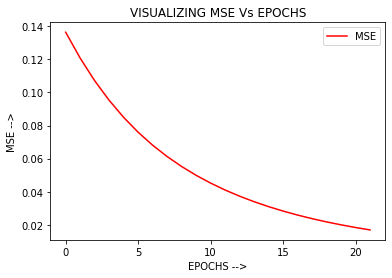

In [ ]:
import matplotlib.pyplot as plt

plt.plot(MSE,label='MSE',color='red')

# Add labels and title
plt.title("VISUALIZING MSE Vs EPOCHS")
plt.xlabel("EPOCHS -->")
plt.ylabel("MSE -->")
 
plt.legend()
plt.show()